In [76]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [77]:

from __future__ import absolute_import,division,print_function,unicode_literals

from tensorflow.keras import datasets,layers,models


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#x_train = x_train.reshape(x_train.shape[0], 32,32, 3)
#x_test =  x_test.reshape(x_test.shape[0], 32,32, 3)

x_train,x_test=x_train/255.0,x_test/255.0



In [78]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [79]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

print(model.summary())





Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [80]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name='sgd'
)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=10,batch_size=50,validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 57s 58ms/step - loss: 2.0233 - accuracy: 0.2469 - val_loss: 1.4692 - val_accuracy: 0.4621
Epoch 2/10
800/800 [==============================] - 46s 58ms/step - loss: 1.3801 - accuracy: 0.5030 - val_loss: 1.2227 - val_accuracy: 0.5601
Epoch 3/10
800/800 [==============================] - 41s 51ms/step - loss: 1.1677 - accuracy: 0.5849 - val_loss: 1.1104 - val_accuracy: 0.6078
Epoch 4/10
800/800 [==============================] - 38s 48ms/step - loss: 1.0251 - accuracy: 0.6372 - val_loss: 1.0221 - val_accuracy: 0.6460
Epoch 5/10
800/800 [==============================] - 39s 48ms/step - loss: 0.9127 - accuracy: 0.6773 - val_loss: 0.9947 - val_accuracy: 0.6516
Epoch 6/10
800/800 [==============================] - 37s 46ms/step - loss: 0.8315 - accuracy: 0.7057 - val_loss: 0.9885 - val_accuracy: 0.6602
Epoch 7/10
800/800 [==============================] - 39s 49ms/step - loss: 0.7669 - accuracy: 0.7309 - val_loss: 0.9391 - val_accuracy:

313/313 - 3s - loss: 0.9897 - accuracy: 0.6829


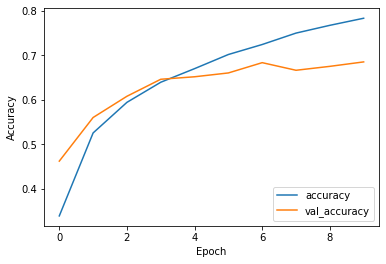

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)